In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
from nltk.util import ngrams
%matplotlib inline

In [110]:
# dataset com autor, palavras e tfidf de cada palavra
shire = pd.read_csv('shire.csv')

In [111]:
shire.head()

,author,word,tfidf
0,gandalf,gandalf,600.00
1,gandalf,cachimbo,179.87
2,gandalf,inimigo,130.03
3,gandalf,mago,217.02
4,gandalf,aventura,98.74


In [112]:
# criando um dataset para cada autor
gandalf_df = shire[shire['author'] == 'gandalf']
bilbo_df = shire[shire['author'] == 'bilbo']
sauron_df = shire[shire['author'] == 'sauron']
galadriel_df = shire[shire['author'] == 'galadriel']

In [113]:
# juntando tudo numa só tabela, porém com os tfidf
# ordenados do maior para o maior
graph_df = pd.concat([
    gandalf_df.sort_values(by='tfidf', ascending=False),
    bilbo_df.sort_values(by='tfidf', ascending=False),
    sauron_df.sort_values(by='tfidf', ascending=False),
    galadriel_df.sort_values(by='tfidf', ascending=False)
])

In [114]:
# criando um grafo tendo autores como nós principais e as palavras
# como nós secundários
graph = nx.from_pandas_edgelist(graph_df, source='author', target='word')

In [115]:
# informações do grafo
print(nx.info(graph))

Graph with 23 nodes and 32 edges


C:\Users\Felype\AppData\Local\Temp/ipykernel_16212/2805389686.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [116]:
graph_df

,author,word,tfidf
0,gandalf,gandalf,600.00
5,gandalf,anel,256.05
3,gandalf,mago,217.02
7,gandalf,hobbits,216.62
1,gandalf,cachimbo,179.87
6,gandalf,tolos,138.31
2,gandalf,inimigo,130.03
4,gandalf,aventura,98.74
14,bilbo,comida,267.01
12,bilbo,aventura,236.89


In [117]:
# lista com os tfidf (ler última célula)
tfidf_list = graph_df['tfidf']

In [118]:
# verificando palavras duplicdas
graph_df.duplicated(subset=['word'])

0     False
5     False
3     False
7     False
1     False
6     False
2     False
4     False
14    False
12     True
10     True
9      True
8     False
11    False
15    False
13     True
23    False
21     True
18    False
17    False
20    False
22    False
19     True
16    False
29    False
28    False
24    False
31    False
27     True
25    False
30     True
26     True
dtype: bool

In [119]:
# identificando as palavras duplicadas
words = graph_df['word']
duplicated = (graph_df[words.isin(words[words.duplicated()])]['word'])
duplicated = list(dict.fromkeys(duplicated))
tfidf_mean = np.zeros(len(duplicated))

In [120]:
duplicated_tfidf_df = pd.DataFrame(list(zip(duplicated, tfidf_mean)), 
columns=['words', 'tfidf mean'])

In [121]:
duplicated_tfidf_df

,words,tfidf mean
0,gandalf,0.0
1,anel,0.0
2,hobbits,0.0
3,cachimbo,0.0
4,aventura,0.0
5,poder,0.0


In [122]:
# obtendo o tfidf médio das palavras duplicadas
for word in duplicated:
    duplicated_df = graph_df[graph_df['word'] == word]
    duplicated_tfidf = duplicated_df['tfidf'].mean()
    duplicated_tfidf_df.loc[duplicated_tfidf_df['words'] == word, 'tfidf mean'] = duplicated_tfidf

In [123]:
duplicated_tfidf_df

,words,tfidf mean
0,gandalf,364.1750
1,anel,131.2575
2,hobbits,235.8100
3,cachimbo,164.9900
4,aventura,167.8150
5,poder,114.7800


In [124]:
# novo dataframe sem a coluna de autores
tfidf_df = graph_df.drop(graph_df.columns[0], axis=1, inplace=False)
# removendo as entradas duplicadas
tfidf_df = tfidf_df.drop_duplicates(subset=['word'], keep='first')

# substituindo o tfidf das duplicadas pelo tfidf medio
for i in range(len(duplicated_tfidf_df['words'])):
    key = duplicated_tfidf_df['words'][i]
    value = duplicated_tfidf_df['tfidf mean'][i]
    tfidf_df.loc[tfidf_df['word'] == key, 'tfidf'] = value

# obtendo a lista de tamanhos para os nós
sizes = tfidf_df['tfidf']

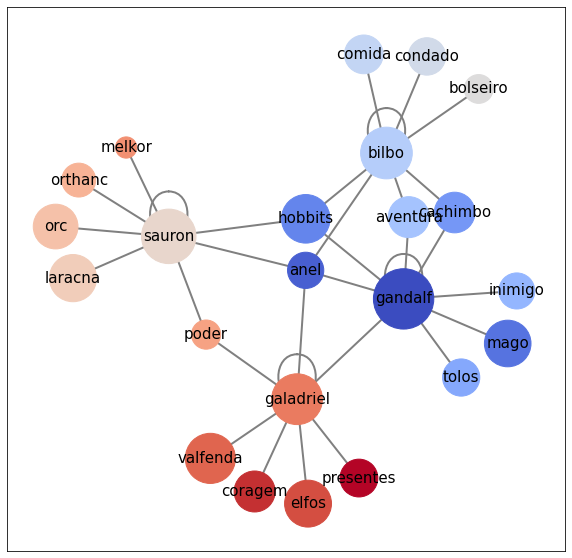

In [126]:
plt.figure(figsize=(10,10))
cmap = plt.cm.coolwarm
colors = [n for n in range(len(graph.nodes()))]
pos = nx.spring_layout(graph, k=.14)
nx.draw_networkx(graph, pos, node_size = sizes.values*10, cmap=cmap,
node_color = colors, edge_color='grey', font_size=15, width=2, alpha=1)